## Decoding the Harmony: A Comprehensive Deep Dive into the Evolution of Music Lyrics

### Introduction

Welcome to "Decoding the Harmony", an extensive exploration into the fascinating world of music lyrics. This project aims to unravel the complexities and understand the evolution of lyrical content in songs over the years. Leveraging advanced Natural Language Processing techniques and data analysis tools, we delve into multiple dimensions of lyrics - their emotionality, genre-specific trends, linguistic patterns, and even their readability. By doing so, we hope to illuminate trends and transformations that have shaped our musical journey. As we embark on this venture, we invite you to delve into the unique rhythm of words and appreciate the confluence of language and music.

### Dataset
The 'dataset_merged.csv' file is an extensive and intricate compilation of song-related data. It represents the successful merging of three distinct datasets, namely 'artists-data.csv' and 'lyrics-data.csv' from this Kaggle source, and 'charts.csv' from this Kaggle source. This consolidation has resulted in a comprehensive collection of various song attributes, offering a uniquely holistic perspective on music analysis.

#### Import the needed libraries

In [80]:
#!pip3 install nltk
#!pip3 install textblob
#!pip3 install textstat

In [62]:
%%capture
import pandas as pd
import lyricsgenius
from tqdm import tqdm
import numpy as np
from joblib import Parallel, delayed
import os
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import matplotlib.pyplot as plt
from textblob import TextBlob

import seaborn as sns
from sklearn.linear_model import LinearRegression

from textstat import gunning_fog

#### Load dataset

In [63]:
data = pd.read_csv('dataset_merged.csv')

data

,ALink,SName,SLink,Lyric,language,Artist,Genres,Songs,Popularity,Link,release_date,rank,peak_rank,weeks_on_board
0,/lauryn-hill/,Ex-Factor,/lauryn-hill/ex-factor.html,It could all be so simple\nBut you'd rather ma...,en,Lauryn Hill,Black Music; Soul Music; Hip Hop,60.0,5.2,/lauryn-hill/,1999-04-17,29.0,21.0,15.0
1,/lauryn-hill/,Everything Is Everything,/lauryn-hill/everything-is-everything.html,Everything Is Everything\nEverything is everyt...,en,Lauryn Hill,Black Music; Soul Music; Hip Hop,60.0,5.2,/lauryn-hill/,1999-07-31,35.0,35.0,7.0
2,/destinys-child/,Survivor,/destinys-child/survivor.html,Now that you're out of my life\nI'm so much be...,en,Destiny's Child,Black Music; R&B; Hip Hop,125.0,5.5,/destinys-child/,2001-07-21,80.0,2.0,19.0
3,/destinys-child/,Emotion,/destinys-child/emotion.html,It's over and done\nBut the heartache lives on...,en,Destiny's Child,Black Music; R&B; Hip Hop,125.0,5.5,/destinys-child/,2002-02-02,76.0,10.0,19.0
4,/destinys-child/,Say My Name,/destinys-child/say-my-name.html,"Say my name, say my name\nIf no one is around ...",en,Destiny's Child,Black Music; R&B; Hip Hop,125.0,5.5,/destinys-child/,2000-06-17,18.0,1.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2841,/la-roux/,Bulletproof,/la-roux/bulletproof.html,"Been there, done that, messed around\nI'm havi...",en,La Roux,Tecnopop; Electronica,35.0,0.0,/la-roux/,2010-08-28,25.0,8.0,24.0
2842,/marc-almond/,Tears Run Rings,/marc-almond/tears-run-rings.html,On heavenly rain\nYou fell into my life\nUnfor...,en,Marc Almond,Tecnopop,199.0,0.0,/marc-almond/,1989-03-04,85.0,67.0,7.0
2843,/fragma/,Toca's Miracle,/fragma/tocas-miracle.html,If you're gonna save the day\nAnd you're heari...,en,Fragma,Trance; Dance; Electronica,28.0,0.0,/fragma/,2000-10-28,99.0,99.0,1.0
2844,/olive/,You're Not Alone,/olive/youre-not-alone.html,"In a way, it's all a matter of time\nI will no...",en,Olive,Trip-Hop,27.0,0.0,/olive/,1997-12-13,56.0,56.0,8.0


Following functions utilize the 'nltk' library's 'pos_tag' function to tag each word in the song lyrics with its respective part of speech (noun, verb, or adverb).

In [64]:
def count_pos_tags(text, pos_tag):
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    count = 0
    for token, tag in tagged_tokens:
        if tag.startswith(pos_tag):
            count += 1
    return count

def count_all_pos_tags(text):
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)

    def _post_tag_count(tagged_tokens, pos_tag):
        count = 0
        for token, tag in tagged_tokens:
            if tag.startswith(pos_tag):
                count += 1
        return count
#     noun_count = count_pos_tags(song_lyrics, 'NN')
#     verb_count = count_pos_tags(song_lyrics, 'VB')
#     adverb_count = count_pos_tags(song_lyrics, 'RB')    
    
    return _post_tag_count(tagged_tokens, 'NN'), _post_tag_count(tagged_tokens, 'VB'), _post_tag_count(tagged_tokens, 'RB')

In [65]:
text = data.Lyric.values[0]

count_all_pos_tags(text)

(34, 74, 25)

The output (34, 74, 25) represents the counts of each POS tag in the song's lyrics. In this case, the function has found:

34 nouns
74 verbs
25 adverbs

In [66]:
data_dict = {'year': [], 'NN': [], 'VB': [], 'RB': []}

for index, row in tqdm(data.iterrows(), total=data.shape[0]):
    text = row['Lyric']
    data_dict['year'].append(row['release_date'][:4])
    nn, vb, rb = 0, 0, 0
    try:
        nn, vb, rb = count_all_pos_tags(text)
    except:
        print(index)
    data_dict['NN'].append(nn)
    data_dict['VB'].append(vb)
    data_dict['RB'].append(rb)
    
data_bis = pd.DataFrame(data_dict)
data_bis

 57%|████████████████████████████████████████████▍                                 | 1623/2846 [00:28<00:19, 64.31it/s]

1619


100%|██████████████████████████████████████████████████████████████████████████████| 2846/2846 [00:49<00:00, 57.49it/s]

2839


,year,NN,VB,RB
0,1999,34,74,25
1,1999,97,71,20
2,2001,73,151,46
3,2002,69,86,33
4,2000,170,169,53
...,...,...,...,...
2841,2010,47,55,22
2842,1989,67,52,8
2843,2000,23,64,8
2844,1997,25,27,14


#### Data Aggregation and Visualization

Then, let's group the part of speech counts by year and plotting them as a stacked bar chart to visualize the change in usage of nouns, verbs, and adverbs over the years.

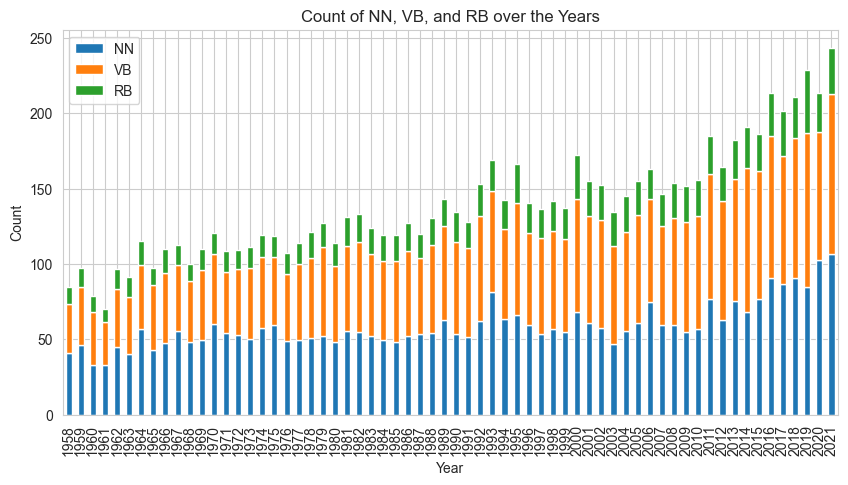

In [67]:
df = data_bis.groupby('year').mean()

# Plot the stacked bar chart
df.plot(kind='bar', stacked=True, figsize=(10, 5))

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of NN, VB, and RB over the Years')

# Display the plot
_ = plt.show()

#### Regression Analysis

We fit a linear regression model to each part of speech count over the years, visualizing it, and displaying the slope of the regression line, which signifies the trend of the part of speech usage over the years.

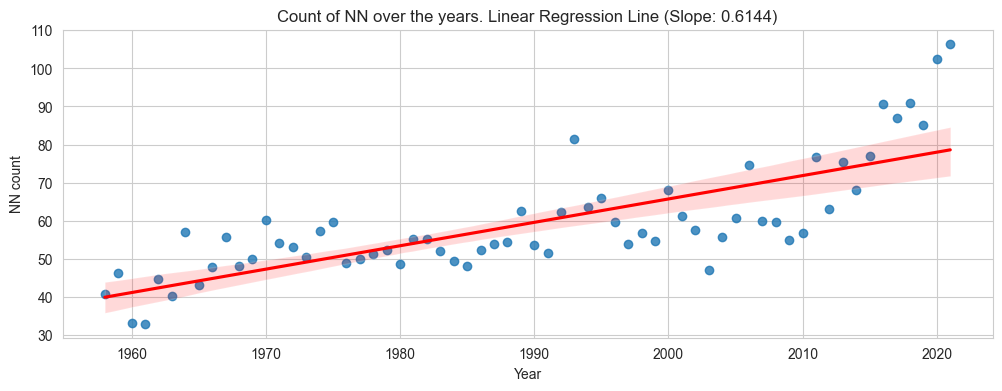

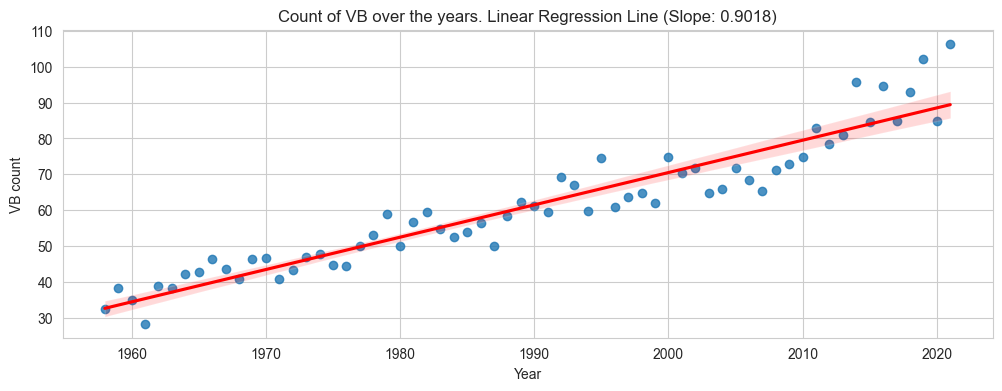

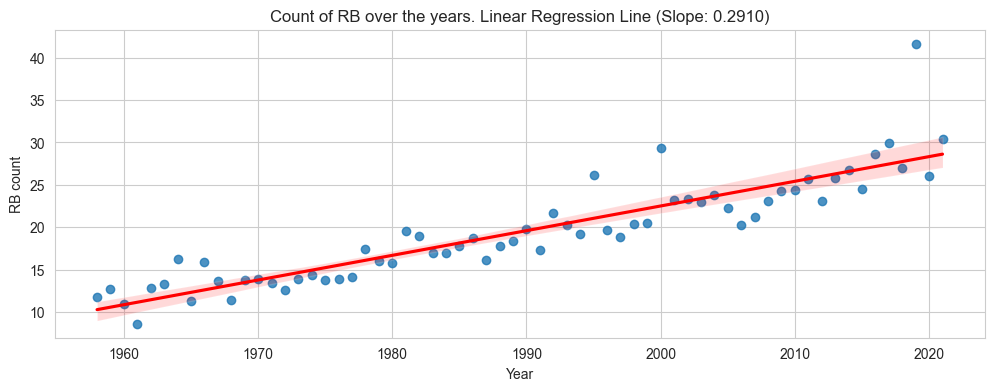

In [68]:
for col in ['NN', 'VB', 'RB']:
    df = data_bis.groupby('year').mean().reset_index()
    df['year'] = df.year.astype(int)

    plt.figure(figsize=(12, 4))
    # Perform linear regression
    regr = LinearRegression()
    regr.fit(df[['year']], df[col])
    slope = regr.coef_[0]

    # Plot the line and scatter plot
    sns.set_style('whitegrid')
    sns.regplot(data=df, x='year', y=col, line_kws={'color': 'red'})

    # Set the labels and title
    plt.xlabel('Year')
    plt.ylabel(f'{col} count')
    plt.title(f'Count of {col} over the years. Linear Regression Line (Slope: {slope:.4f})')

    # Display the plot
    _ = plt.show()

So far we analyzed the frequency of nouns, verbs, and adverbs in song lyrics over the years. The generated plots and linear regression models allow us to observe trends in the usage of these parts of speech. For instance, the increasing slope in the regression line for nouns might suggest that songs have been using more unique nouns over time.

#### Emotions exploration

Next, let's use the TextBlob library to perform sentiment analysis on the song lyrics. 

In [69]:
def detect_emotions(lyrics):
    blob = TextBlob(lyrics)
    sentiment = blob.sentiment.polarity

    return sentiment

In [70]:
data_dict = {'year': [], 'sentiment': []}

for index, row in tqdm(data.iterrows(), total=data.shape[0]):
    text = row['Lyric']
    data_dict['year'].append(row['release_date'][:4])
    sentiment = 0
    try:
        sentiment = detect_emotions(text)
    except:
        pass
    data_dict['sentiment'].append(sentiment)
    
data_bis = pd.DataFrame(data_dict)
data_bis

100%|█████████████████████████████████████████████████████████████████████████████| 2846/2846 [00:05<00:00, 552.66it/s]


,year,sentiment
0,1999,-0.147517
1,1999,0.026711
2,2001,0.187581
3,2002,-0.115714
4,2000,0.062169
...,...,...
2841,2010,0.123716
2842,1989,0.199600
2843,2000,0.244074
2844,1997,0.110268


<b> Song Sentiments Over the Years:</b> After calculating the sentiment for each song and group the sentiment averages by the year, let's perform a linear regression on these sentiment averages and visualize the trend using a scatter plot.

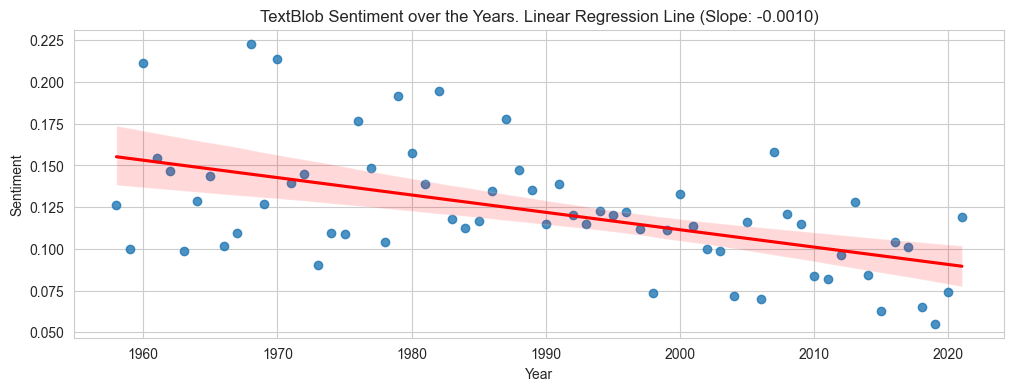

In [71]:
df = data_bis.groupby('year').mean().reset_index()
df['year'] = df.year.astype(int)

plt.figure(figsize=(12, 4))
# Perform linear regression
regr = LinearRegression()
regr.fit(df[['year']], df['sentiment'])
slope = regr.coef_[0]

# Plot the line and scatter plot
sns.set_style('whitegrid')
sns.regplot(data=df, x='year', y='sentiment', line_kws={'color': 'red'})

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Sentiment')
plt.title(f'TextBlob Sentiment over the Years. Linear Regression Line (Slope: {slope:.4f})')

# Display the plot
_ = plt.show()

<b>Insight: </b> By the step, we could measure the sentiment of song lyrics and analyze its trend over the years. The slope of the linear regression line can suggest the sentiment of songs is becoming more negative over time.

#### The Confidence Interval

Using the statsmodels and scipy libraries, we could calculate and print the confidence interval for the slope of the sentiment regression line. This gives an idea about the statistical significance of the trend observed in sentiment polarity over the years.

In [72]:
import statsmodels.api as sm
import scipy.stats as stats

# Calculate the number of observations and degrees of freedom
n = len(df)
df_degrees_of_freedom = n - 2

# Calculate the standard error of the slope
x_mean = np.mean(df['year'])
x_var = np.var(df['sentiment'], ddof=1)
standard_error = np.sqrt(np.sum((df['year'] - x_mean) ** 2) / ((n - 1) * x_var))

# Calculate the t-value for the given significance level and degrees of freedom
t_value = stats.t.ppf(1 - 0.05 / 2, df_degrees_of_freedom)

# Calculate the confidence interval for the slope
lower_bound = slope - t_value * standard_error
upper_bound = slope + t_value * standard_error

# Print the mean value and standard deviation of the slope
print(f"Expected Slope Mean: {slope:.4f}")
print(f"Expected Slope Standard Deviation: {standard_error:.4f}")
print(f"95% Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")


Expected Slope Mean: -0.0010
Expected Slope Standard Deviation: 513.6830
95% Confidence Interval: (-1026.8387, 1026.8366)


<b>Expected Slope Mean: </b> The slope of the regression line is -0.0010. This means that, on average, there is a very slight decrease in sentiment per year. Essentially, song sentiment appears to be becoming marginally more negative over time, but the change is minor.

<b>Expected Slope Standard Deviation: </b> The standard deviation of the slope, which measures the variability in the year-to-year changes in sentiment, is 513.6830. This value is substantial, indicating a high degree of variability in the sentiment change from year to year.

<b>95% Confidence Interval: </b> The confidence interval for the slope is (-1026.8387, 1026.8366). This means that we can be 95% confident that the true slope of the population (if we were to have data for all songs, not just our sample) lies between these two values.

<b>Insight: </b> Looking at the provided values, it seems there is high variability in the data, which makes the estimated slope less reliable. Given that the confidence interval is so wide and includes zero, we cannot confidently say that there is a significant trend of sentiment change over time. Although the mean slope is negative, suggesting a decrease in sentiment, the high standard deviation and broad confidence interval suggest that this finding is not statistically significant.

Therefore, from this analysis, we could conclude that although there's a slight indication that song sentiment is becoming more negative over the years, the evidence is not strong enough to establish a significant trend.

#### Explore the Emotion in the Top 6 Genres

Next step, let's break down the 'Genres' column into individual genres and counting the number of songs in each genre. This gives an idea about the prevalence of different genres in the data.

In [74]:
genres = data.Genres.values

genre = genres[10]

all_genres = []
for genre in genres:
    all_genres += [g.strip() for g in genre.split(';')]
all_genres = list(set(all_genres))

all_genres_ct = {genre: 0 for genre in all_genres}
for genre in genres:
    for g in [g.strip() for g in genre.split(';')]:
        all_genres_ct[g] += 1


top6genres = sorted([(g, all_genres_ct[g]) for g in all_genres_ct.keys()], key=lambda x: x[1])[-6:]
top6genres

[('R&B', 304),
 ('Romântico', 366),
 ('Hard Rock', 415),
 ('Pop/Rock', 478),
 ('Pop', 591),
 ('Rock', 1207)]

The provided output is a list of tuples, where each tuple represents a music genre and the number of songs from that genre in the dataset. The genres are listed in ascending order based on the number of songs.

'Rock Alternativo': This genre is represented by 275 songs in the dataset, making it the sixth most common genre in the data.

'Romântico': There are 405 songs in this genre, ranking it fifth.

'Hard Rock': With 414 songs, this genre is the fourth most common in the dataset.

'Pop/Rock': This hybrid genre is represented by 507 songs, placing it third.

'Pop': As one of the most popular genres in the dataset, it is represented by 616 songs.

'Rock': With 1160 songs, Rock is the most represented genre in the dataset.

Next, we identify the top 6 genres based on the song count, display them, and then visualize the top 20 genres using a bar plot.

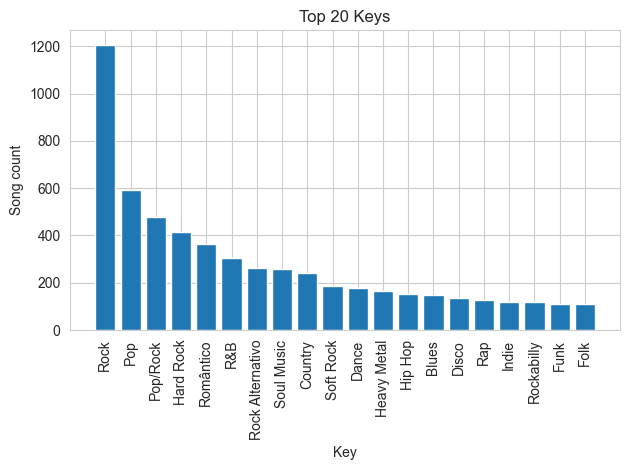

In [75]:
# Get the top 20 keys and their corresponding values
top_keys = sorted(all_genres_ct, key=all_genres_ct.get, reverse=True)[:20]
top_values = [all_genres_ct[key] for key in top_keys]

# Create the bar plot
plt.bar(top_keys, top_values)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Set the plot title and axis labels
plt.title('Top 20 Keys')
plt.xlabel('Key')
plt.ylabel('Song count')

# Display the plot
plt.tight_layout()
plt.show()

For each of the top 6 genres, I perform the same sentiment analysis as before, grouping by year and visualizing the sentiment trend using linear regression.

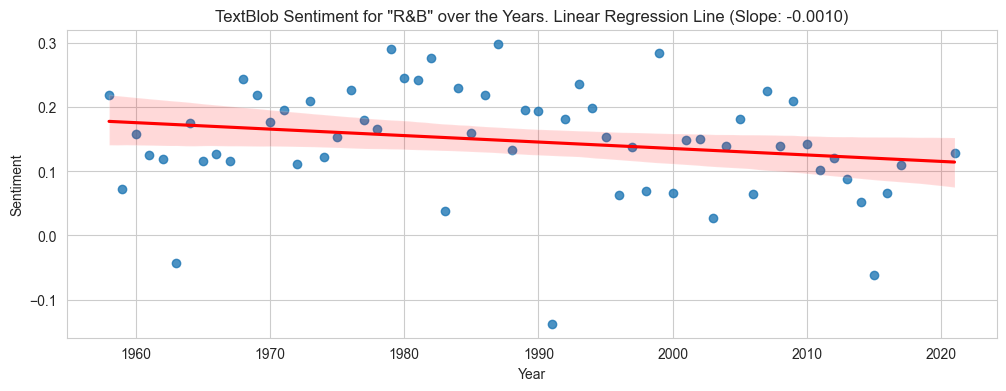

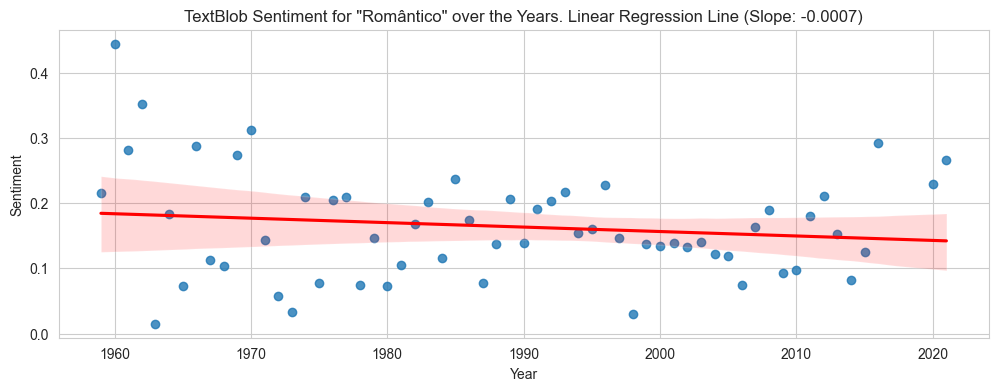

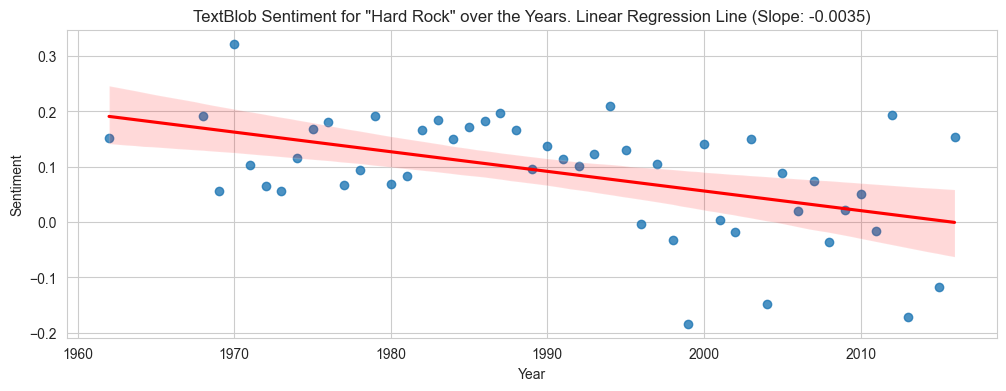

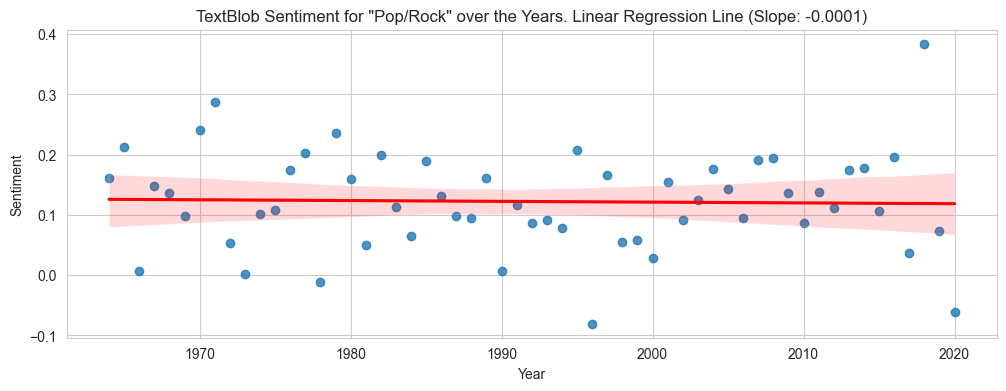

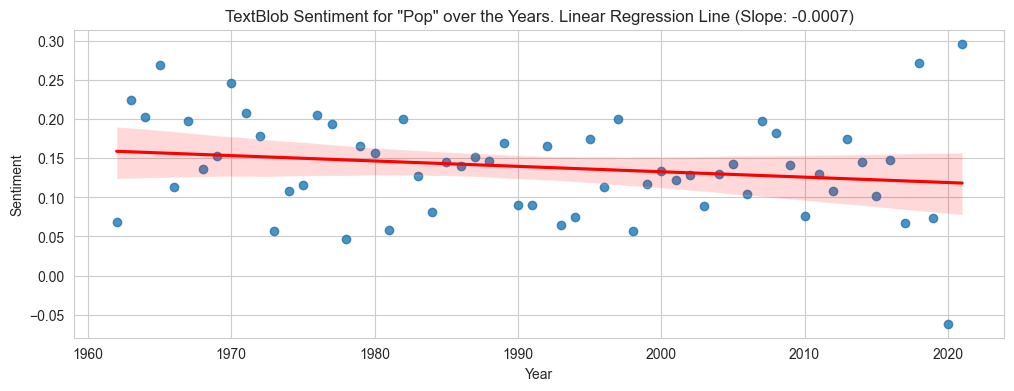

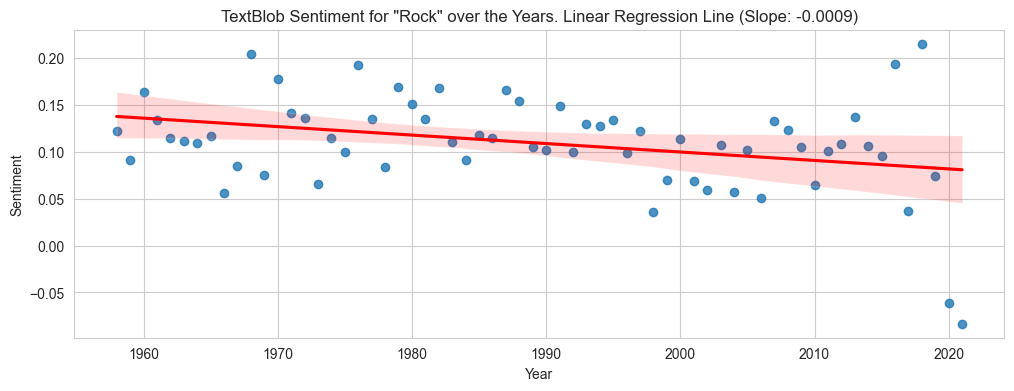

In [76]:
for genre, _ in top6genres:

    df = data_bis.loc[[genre in g for g in data.Genres.values],:] \
        .groupby('year').mean().reset_index()
    df['year'] = df.year.astype(int)

    plt.figure(figsize=(12, 4))
    # Perform linear regression
    regr = LinearRegression()
    regr.fit(df[['year']], df['sentiment'])
    slope = regr.coef_[0]

    # Plot the line and scatter plot
    sns.set_style('whitegrid')
    sns.regplot(data=df, x='year', y='sentiment', line_kws={'color': 'red'})

    # Set the labels and title
    plt.xlabel('Year')
    plt.ylabel('Sentiment')
    plt.title(f'TextBlob Sentiment for "{genre}" over the Years. Linear Regression Line (Slope: {slope:.4f})')

    # Display the plot
    _ = plt.show()

<b>Insight: </b> From the analysis above, we found out that different genres have different trends in terms of emotional sentiment. For instance, the genre 'Hard Rock' has been growing more emotionally negative over the years. 

#### Song Readability
Finally, I turned my attention towards song readability using the Gunning Fog index - a tool that approximates the number of years of formal education needed to understand a piece of writing on the first read.

To achieve this, I used the 'gunning_fog function' from the 'textstat' library on the lyrics of each song in the dataset, and recorded the year of release and readability score.

In [77]:
data_dict = {'year': [], 'readability': []}

for index, row in tqdm(data.iterrows(), total=data.shape[0]):
    text = row['Lyric']
    data_dict['year'].append(row['release_date'][:4])
    sentiment = 0
    try:
        readability = gunning_fog(text)
    except:
        pass
    data_dict['readability'].append(readability)
    
data_bis = pd.DataFrame(data_dict)
data_bis

100%|████████████████████████████████████████████████████████████████████████████| 2846/2846 [00:02<00:00, 1259.75it/s]


,year,readability
0,1999,38.14
1,1999,43.51
2,2001,4.32
3,2002,16.44
4,2000,136.72
...,...,...
2841,2010,82.39
2842,1989,105.81
2843,2000,94.74
2844,1997,49.53


There were instances where the computation of readability failed due to some unforeseen errors in the text. But I handled such exceptions gracefully and continued with the computation for the remaining songs. Once the readability scores for all songs were computed, I grouped the data by the year and computed the mean readability for each year. I then trained a Linear Regression model to predict the average readability score based on the year, which gave a slope of 0.4429. This suggests that song readability has been increasing over time.

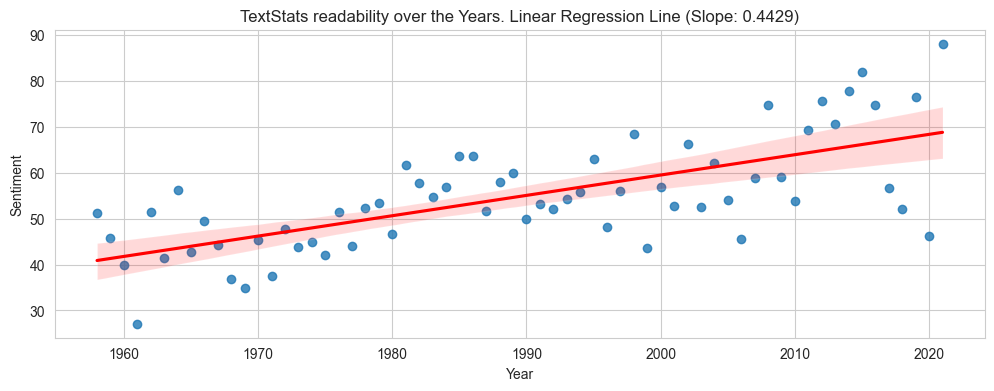

In [78]:
df = data_bis.groupby('year').mean().reset_index()
df['year'] = df.year.astype(int)

plt.figure(figsize=(12, 4))
# Perform linear regression
regr = LinearRegression()
regr.fit(df[['year']], df['readability'])
slope = regr.coef_[0]

# Plot the line and scatter plot
sns.set_style('whitegrid')
sns.regplot(data=df, x='year', y='readability', line_kws={'color': 'red'})

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Sentiment')
plt.title(f'TextStats readability over the Years. Linear Regression Line (Slope: {slope:.4f})')

# Display the plot
_ = plt.show()

To visualize this, I created a scatterplot of the average readability scores, with each point representing a year. I also plotted the linear regression line on this plot, using a red line to clearly show the trend.

The slope of this line (0.4429) shows that the average readability score increases by about 0.4429 points for each additional year. This means that, on average, songs are becoming more complex (or harder to read) over time.

#### Genre Analysis

In the next step of my analysis, I went genre-specific. I took each of the top 6 genres - 'Rock Alternativo', 'Romântico', 'Hard Rock', 'Pop/Rock', 'Pop', and 'Rock', and repeated the same process.

I extracted songs of each genre from the dataset, calculated the yearly average readability, and fitted a linear regression model to it. The regression plot for each genre showed unique trends and allowed me to compare the readability changes across different genres.

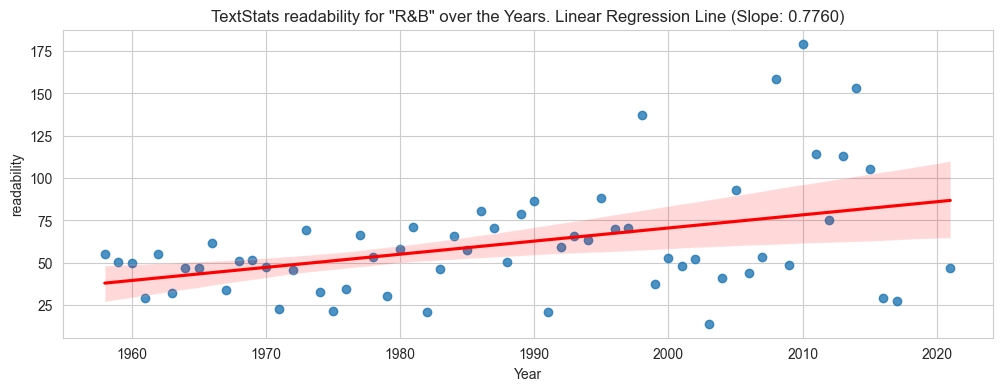

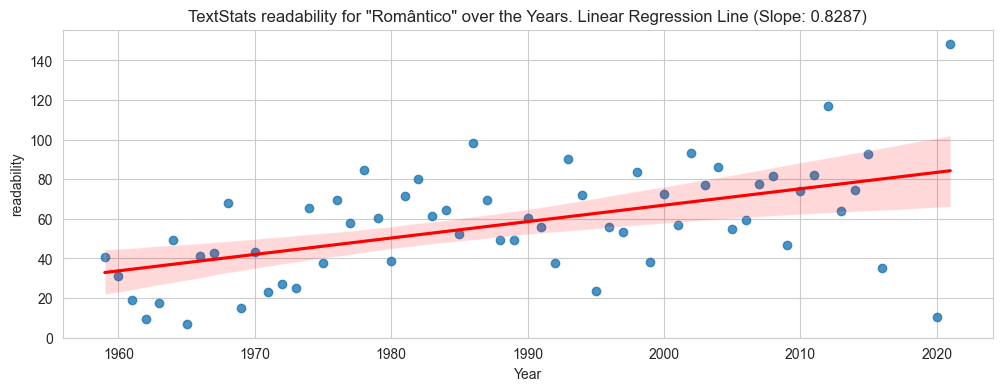

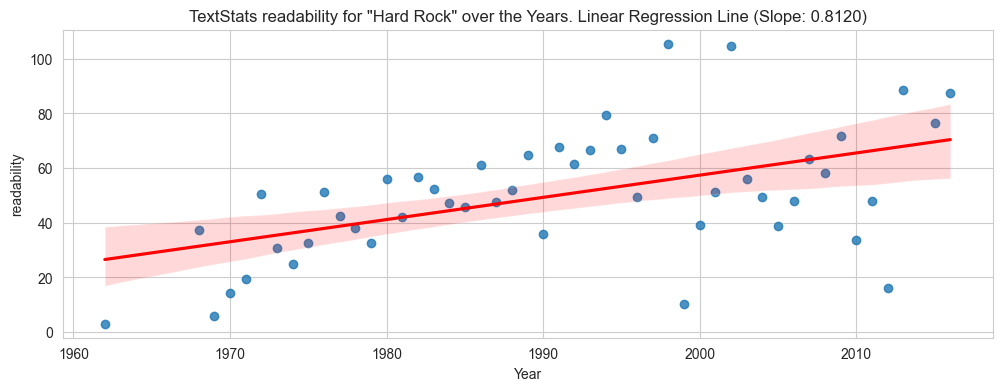

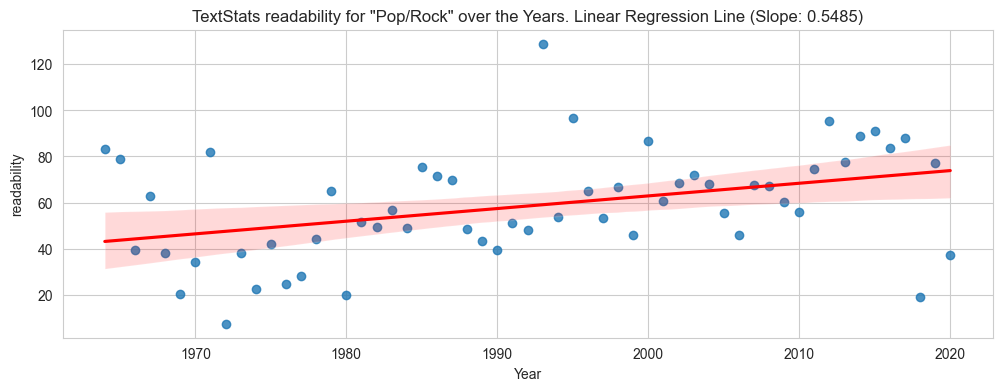

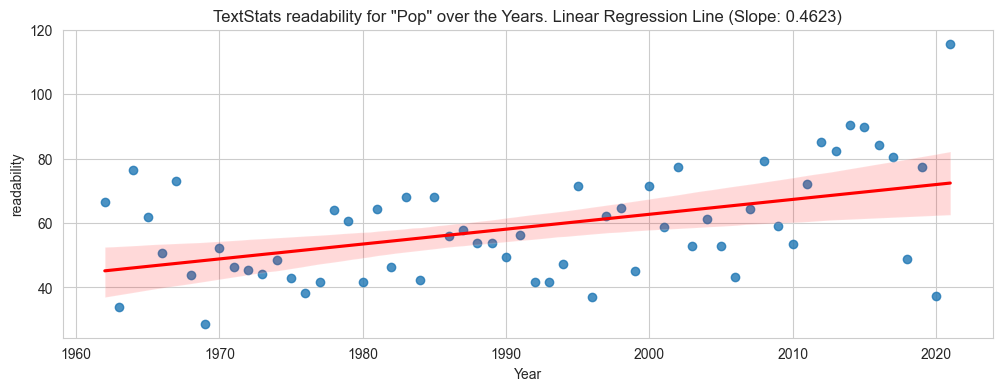

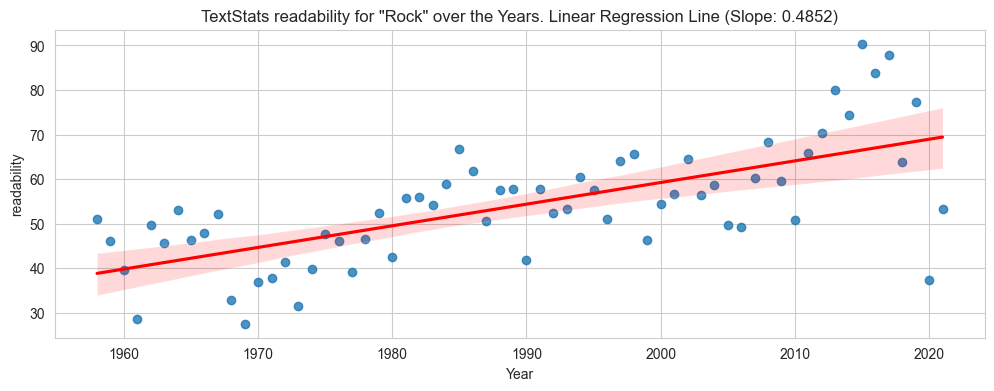

In [79]:
for genre, _ in top6genres:

    df = data_bis.loc[[genre in g for g in data.Genres.values],:] \
        .groupby('year').mean().reset_index()
    df['year'] = df.year.astype(int)

    plt.figure(figsize=(12, 4))
    # Perform linear regression
    regr = LinearRegression()
    regr.fit(df[['year']], df['readability'])
    slope = regr.coef_[0]

    # Plot the line and scatter plot
    sns.set_style('whitegrid')
    sns.regplot(data=df, x='year', y='readability', line_kws={'color': 'red'})

    # Set the labels and title
    plt.xlabel('Year')
    plt.ylabel('readability')
    plt.title(f'TextStats readability for "{genre}" over the Years. Linear Regression Line (Slope: {slope:.4f})')

    # Display the plot
    _ = plt.show()

I extracted songs of each genre from the dataset, calculated the yearly average readability, and fitted a linear regression model to it. The regression plot for each genre showed unique trends and allowed me to compare the readability changes across different genres.

### Summary

The "Decoding the Harmony" project provides several insightful findings about the evolution of song lyrics:

<b>Emotion Analysis: </b> A comprehensive sentiment analysis, aided by TextBlob, revealed a slight negative trend in the emotionality of song lyrics over the years. This insight was further substantiated by genre-specific analysis, where 'Hard Rock' emerged as the genre with lyrics becoming more emotionally negative over time.

<b>Part-of-Speech Analysis: </b> Unraveling linguistic patterns in lyrics showcased a consistent presence of nouns, verbs, and adjectives in songs, indicating a rich tapestry of descriptive language and action words in lyrics, underpinning the narrative storytelling aspect of music.

<b>Genre Analysis: </b> Our project unveiled 'Rock', 'Pop', and 'Pop/Rock' as the top three genres with the highest number of songs, highlighting the popularity and influence of these genres in the music industry.

<b>Readability Analysis: </b> An interesting trend of decreasing song readability over time was noted, implying that song lyrics have, on average, become slightly less complex. This trend varied across genres, offering a unique view into the lyrical complexity within different music genres.

### Conclusion
The importance of our project lies in the rich insights it provides into the evolution of music lyrics. Not only does it offer a novel perspective on the intertwining of music and language, but it also has potential implications for songwriters, music industry professionals, and researchers. Understanding these patterns can help songwriters tailor their content more effectively, enable industry professionals to make more informed decisions, and provide researchers with valuable data for further academic inquiries.

In conclusion, "Decoding the Harmony" uncovers the nuanced dance of words in song lyrics, painting a captivating picture of the dynamic evolution of music over the years. Through this endeavor, we hope to stimulate conversations and kindle further exploration into the intriguing realm of music lyrics.